# Meteorite Landings from 1900

Author: **Marcin Sikorski**<br/>
Date: August, 2021

Space and meteorites have always been a fun topic for me since a was a kid. The fact that meteorites are extraterrestrial objects and travel humongous distances to reach our planet is fascinating. Many of them are very old, some dating from the early days of the Solar System.

This simple analysis aims to practice data wrangling with Python libraries. The dataset is great for testing geospatial visualization based on their fall type. This report was made in Jupyter Notebook in Python 3. Figures were created with <code>folium</code> basemaps which allows us to interact and browse visualizations in HTML.

**Report content:**<br/>
1. Loading and Clearing Data
2. Exploring Dataframe
3. Basic Analysis<br/>
    3.1 Counting Meteorite Class<br/>
    3.2 Correlation Between Year and Mass<br/>
    3.3 Mass Distribution<br/>
    3.4 Year Distrubution<br/>
4. Geospatial Visualization<br/>
    4.1 Mapping Location Where the Most Massive Meteorite hit Earth<br/>
    4.2 Mapping Meteorites Worldwide<br/>
    4.3 Mapping Landings Density in Europe<br/>
    4.4 Mapping Meteorites in Australia by Their Mass<br/>
5. Conclusions


### Dataset Description

This dataset was provided by Meteoritical Society on meteorites that have fallen to Earth from outer space. It includes the location, mass, composition, and fall year for over 45,000 meteorites that have struck our planet. The data were downloaded from [Kaggle][1]. [Accessed 2nd July 2021] which is originated to NASA's Data Portal.

[1]: http://www.kaggle.com/nasa/meteorite-landings 'Kaggle'

In [1]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt
import folium

### 1. Loading and Clearing Data

We can easily load our *.csv* file into one dataframe using <code>pandas</code>:

In [2]:
# loading data into single dataframe
df = pd.read_csv('meteorite-landings.csv')

# display first rows
df[:6]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.100000, 71.800000)"


Here are the data types of the dataframe:

In [3]:
# show data types
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

We can convert float values into integers for <code>year</code> column:

In [4]:
# in case 'year' column has blank values
df['year'] = df['year'].fillna(0)

In [5]:
# convert floats into ints
df['year'] = df['year'].astype(int)

# checking once more
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year             int32
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

We will drop some columns that will be unnecessary for us from this moment. This will reduce dataframe size. We will also rename the header into shorter values to simplify our further work:

In [6]:
# drop columns from dataframe
df = df.drop(columns=['id', 'GeoLocation'])

# rename columns using dictionary
df.rename(columns={'nametype':'type', 'recclass':'class', 'reclat':'lat', 'reclong':'long'}, inplace=True)

Also we want to express meteorite mass in kilograms. The current column contains values in grams:

In [7]:
# convert grs into kgs
df['mass'] = df['mass'] / 1000

In [8]:
# checking the data distribution of last 15 years
df.groupby('year').count().tail(15)

,name,type,class,mass,fall,lat,long
year,,,,,,,
2001,1650,1650,1650,1650,1650,1339,1339
2002,2078,2078,2078,2073,2078,1071,1071
2003,3323,3323,3323,3323,3323,1754,1754
2004,1940,1940,1940,1940,1940,366,366
2005,875,875,875,874,875,329,329
2006,2456,2456,2456,2455,2456,1616,1616
2007,1189,1189,1189,1189,1189,1038,1038
2008,957,957,957,957,957,936,936
2009,1497,1497,1497,1497,1497,1496,1496


There is practically no data after 2013.
Now we will extract a subset of data. We are interested in meteorites which strucked Earth after 1900:

In [9]:
data = df[(df['year'] > 1899) & (df['year'] < 2014)]

# display first rows
data[:10]

,name,type,class,mass,fall,year,lat,long
1,Aarhus,Valid,H6,0.720,Fell,1951,56.18333,10.23333
2,Abee,Valid,EH4,107.000,Fell,1952,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1.914,Fell,1976,16.88333,-99.90000
4,Achiras,Valid,L6,0.780,Fell,1902,-33.16667,-64.95000
5,Adhi Kot,Valid,EH4,4.239,Fell,1919,32.10000,71.80000
6,Adzhi-Bogdo (stone),Valid,LL3-6,0.910,Fell,1949,44.83333,95.16667
8,Aguada,Valid,L6,1.620,Fell,1930,-31.60000,-65.23333
9,Aguila Blanca,Valid,L,1.440,Fell,1920,-30.86667,-64.55000
10,Aioun el Atrouss,Valid,Diogenite-pm,1.000,Fell,1974,16.39806,-9.57028
11,Aïr,Valid,L6,24.000,Fell,1925,19.08333,8.38333


A note about missing or incorrect data points attached to the dataset advised to treat this type of data as NA. We will filter out rows containg missing coordinates and zero meteorite mass, since it is quite difficult to get these data. These actions will not affect our analysis:

In [10]:
# drop rows where condition fulfilled
condition = data[(data['lat'] == 0) & (data['long'] == 0) & (data['mass'] == 0)]
data = data.drop(condition.index)

In [11]:
# drop rows where at least one element is missing
data = data.dropna()

In [12]:
# searching for empty entries
data.isnull().sum()

name     0
type     0
class    0
mass     0
fall     0
year     0
lat      0
long     0
dtype: int64

In [13]:
# checking if any NA values are left
data.isna().sum()

name     0
type     0
class    0
mass     0
fall     0
year     0
lat      0
long     0
dtype: int64

### 2. Exploring Dataframe

Now that our new dataframe is ready it is time to look up for some detail and information about it:

In [14]:
# return dimensions of dataframe
data.shape

(37407, 8)

In [15]:
# show data types for each column
data.dtypes
#data.describe()

name      object
type      object
class     object
mass     float64
fall      object
year       int32
lat      float64
long     float64
dtype: object

In [16]:
# show the number of types
data['type'].value_counts()

Valid     37386
Relict       21
Name: type, dtype: int64

### 3. Basic Analysis

#### 3.1 Counting Meteorite Class

Let's plot how many meteorites by <code>class</code> are visible:

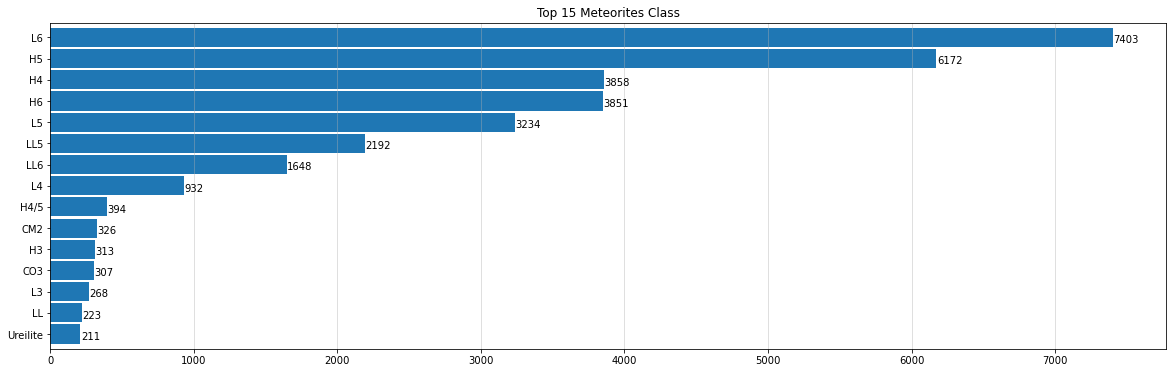

In [17]:
# count 15 most numerous 'class' values
m_class = data['class'].value_counts().head(15)

# create list of labels
labels = m_class.tolist()

# plotting horizontal bar plot
m_class.plot(kind='barh', title='Top 15 Meteorites Class', width=.9, figsize=(20, 6))
plt.grid(axis='x', alpha=.5)
plt.gca().invert_yaxis()

# add count values from list
for i, v in enumerate(labels):
    plt.text(v + 3, i + .25, str(v))

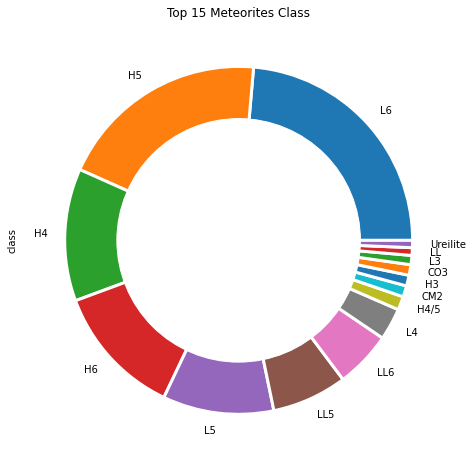

In [18]:
# plotting donut chart
m_class.plot(kind='pie', title='Top 15 Meteorites Class', figsize=(8, 8))

plt.pie(m_class, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'w'})
circle=plt.Circle((0,0), 0.7, color='w')
plt.gcf().gca().add_artist(circle)

In [19]:
# and tabular form
pd.DataFrame({'Count': m_class}).transpose()

,L6,H5,H4,H6,L5,LL5,LL6,L4,H4/5,CM2,H3,CO3,L3,LL,Ureilite
Count,7403,6172,3858,3851,3234,2192,1648,932,394,326,313,307,268,223,211


#### 3.2 Correlation Between Mass and Year

Let's find correlation coefficients between variables only for fallen meteorites by printing them in a matrix form. We are interested in summarizing data for <code>mass</code> and <code>year</code>.

In [20]:
# new subset of 'Fell' meteorites
subset = data[(data['fall'] == 'Fell')]

# correlation matrix
corr_matrix = subset.corr()
corr_matrix

,mass,year,lat,long
mass,1.000000,0.001687,0.038935,0.058102
year,0.001687,1.000000,-0.013007,-0.045326
lat,0.038935,-0.013007,1.000000,-0.042908
long,0.058102,-0.045326,-0.042908,1.000000


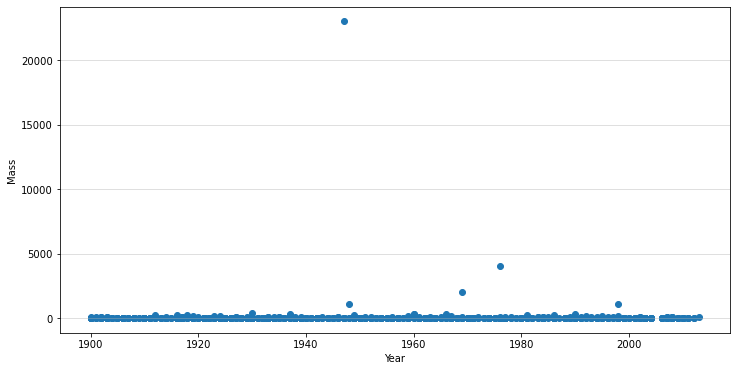

In [21]:
# scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x=subset['year'], y=subset['mass'])
plt.xlabel('Year')
plt.ylabel('Mass')
plt.grid(axis='y', alpha=.5)

There is a positive correlation between these two variables (0.001687). Mass of fallen meteorites tend to barely increase over time. However, it’s not a perfect relationship. We can spot outliers on figure which surely distort the factor. Meteorite strikes are most likely random events.

Let's get rid of the outliers by filtering the dataframe and get a zoomed preview of the data points distribution.

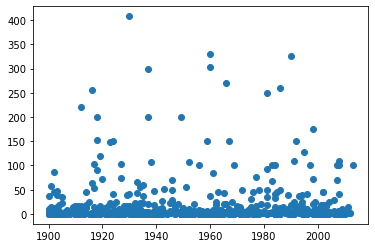

0.024741817037891044

In [22]:
# filter out 'mass' above 1000 kg
subset2 = data[(data['fall'] == 'Fell') & (data['mass'] < 1000)]

# scatter plot
plt.scatter(x=subset2['year'], y=subset2['mass'])
plt.show()

# correalation between mass and year
subset2['mass'].corr(subset2['year'])

Still the relationship is not strong but the correlation is higher after deleting outliers.

Another useful measurement in data science is covariance. It's details provides many opportunities to understand multivariate data and the shape of the relationship. Thow, I will leave this topic for another project.

#### 3.3 Mass Distribution

Lets plot meteorites distribution by <code>mass</code>. A simple histogram should be able to reveal this:

In [23]:
# show unique values and percentages
data['fall'].value_counts(normalize=True)*100

Found    98.176812
Fell      1.823188
Name: fall, dtype: float64

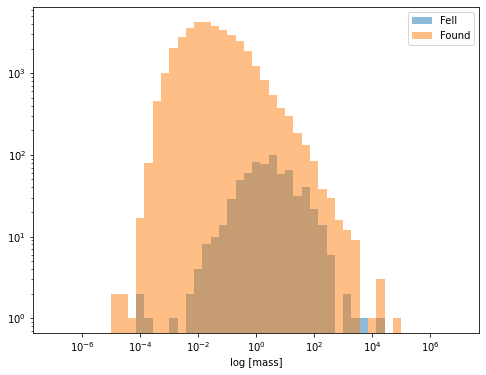

In [24]:
import numpy as np

# plot by 'fall' value
groups = data.groupby('fall')

#histogram
plt.figure(figsize=(8, 6))
for name, group in groups:
    plt.hist(group.mass, bins=10 ** np.linspace(-7, 7), alpha=.5)
plt.legend(['Fell','Found'])
plt.xlabel('log [mass]')
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.show()

#### 3.4 Year Distrubution

We will plot the distribution meteorite recorded by <code>year</code> with a histogram:

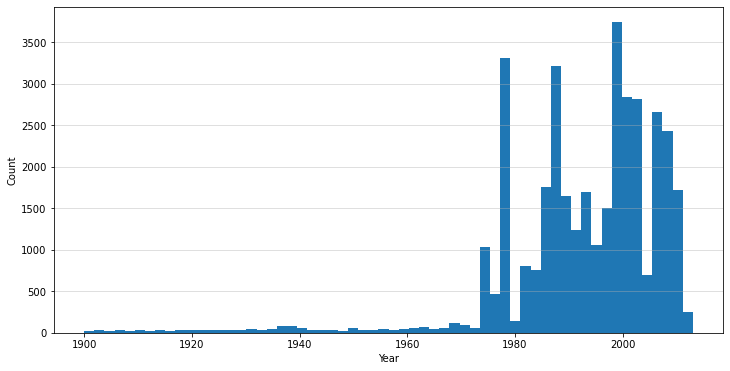

In [25]:
# histogram
plt.figure(figsize=(12, 6))
plt.hist(x=data['year'], bins=60, linewidth=.9)
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(axis='y', alpha=.5)

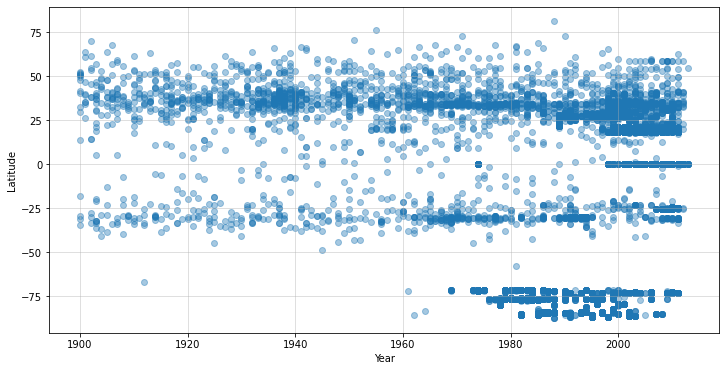

In [26]:
# scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x=data['year'], y=data['lat'], alpha=.4)
plt.xlabel('Year')
plt.ylabel('Latitude')
plt.grid(True, alpha=.5)

Above figure shows meteorite latitude sites versus year. Far more meteorites fall to the Northern Hemisphere. Both Hemispheres are more often besieged around 25th parallels.

It is also interesting that in the Southern Hemisphere, at latitude 75&deg;, meteorites began to be found since the 1960s. These regions on the world map correspond to Antarctica, and it was in the 1960s that scientific research began on a larger scale on this land.

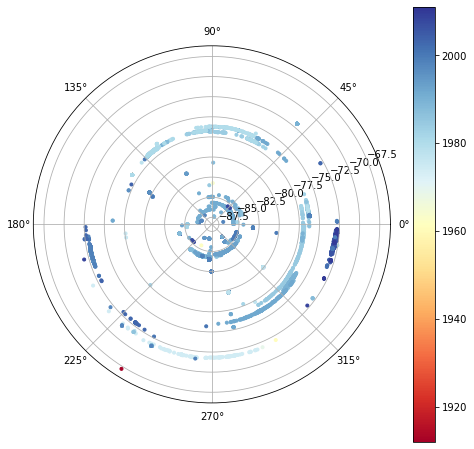

In [27]:
# new subset of data for Antarctica
antarctica = data[(data['lat'] < -60)]

# scatter plot - Antarctica
plt.figure(figsize=(8, 8))
plt.subplot(111, projection='polar')
plt.grid(True)

sc = plt.scatter(x=antarctica['long'], y=antarctica['lat'], c=antarctica['year'], marker='.', cmap='RdYlBu')
plt.colorbar(sc)

Antarctica is based on South Pole and using a polar projection is an absolute necessary. This figure gives us a much better overview on the continent. It's interesting that the meteorite sites are distributed concentrically, most likely caused by Earth's rotary movement. Marker colors clearly show the conclusion from the previous chart. There's one red point indicating that it was recorded before 1920.

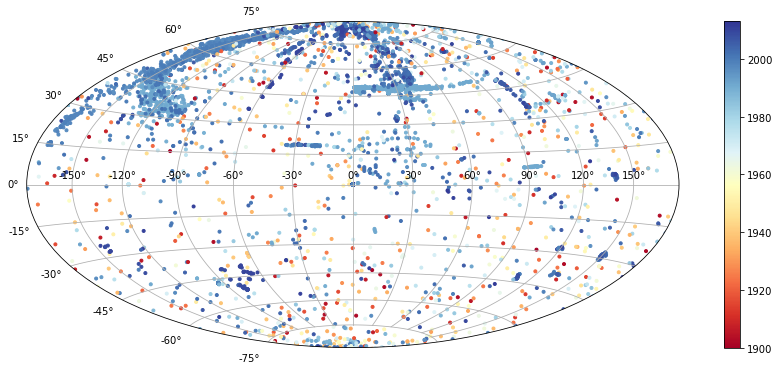

In [28]:
# scatter plot by year
plt.figure(figsize=(16, 6))
plt.subplot(111, projection='hammer')
plt.grid(True)

sc = plt.scatter(x=data['long'], y=data['lat'], c=data['year'], marker='.', cmap='RdYlBu')
plt.colorbar(sc)

A worldwide scatter plot with Hammer projection looks messy due to it's distortion (equal-area properties). The figure does not give much information yet it still shows the Northern Hemisphere point density upon the lower (blue dots).
It's not the best, so let's try another plot.

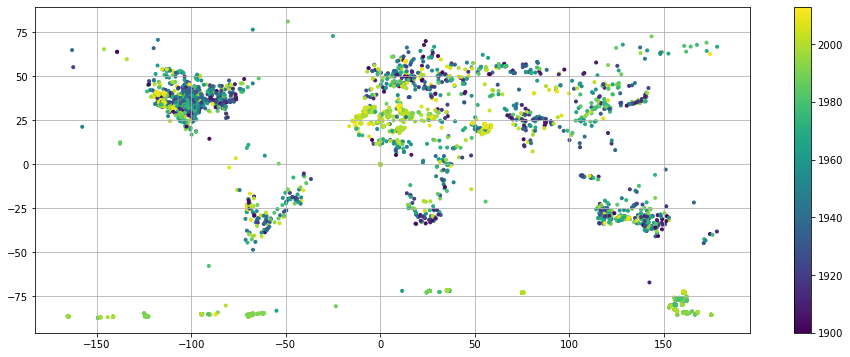

In [29]:
# another scatter plot
plt.figure(figsize=(16, 6))
plt.grid(True)

sc = plt.scatter(x=data['long'], y=data['lat'], c=data['year'], marker='.', cmap='viridis')
plt.colorbar(sc)

Looks more familiar? Much more data was collected after 1970, as indicated by green and yellow markers. Soon we will plot these points on the world map for better insights.

### 4. Geospatial Visualization

#### 4.1 Mapping Location Where the Most Massive Meteorite hit Earth

Using <code>folium</code> we will map the exact point where the biggest meteorite struck. Hovering cursor over the marker will display data about it's name and year.

In [30]:
# setting new index for extracting single cells
data1 = data.set_index('mass', drop=False)

# extracting cells
lat = data1.loc[data['mass'].max(), 'lat']
long = data1.loc[data['mass'].max(), 'long']

# marker label
label = data1.loc[data['mass'].max(), 'name'] + ', ' + data1.loc[data['mass'].max(), 'year'].astype(str)

# displaying map
map_max = folium.Map(width=400, height=400, location=[lat, long], zoom_start=4,
                     tiles='Stamen Terrain', crs='EPSG3857')

# adding marker
folium.Marker(location=[lat, long], tooltip=label, icon=folium.Icon(color='red')).add_to(map_max)
map_max

In [31]:
# find more detail about this meteorite
pd.DataFrame(data.loc[data['mass'].idxmax()]).transpose()

,name,type,class,mass,fall,year,lat,long
16383,Hoba,Valid,"Iron, IVB",60000,Found,1920,-19.5833,17.9167


#### 4.2 Mapping Meteorites Worldwide

With <code>folium</code> we will plot points grouping by *fall*. There should be only [Fell, Found] values in column - fell (meteorites that were witnessed during their fall) and found (meteorites that are discovered many years later). We will plot an interactive leaflet world map data and the meteorite data into two layers.

In [32]:
# color function categorizing points by 'fall'
def marker_color(fall):
    if fall == 'Fell':
        return 'blue'
    else:
        return 'orange'

In [33]:
# displaying map
map_world = folium.Map(location=[0, 0], zoom_start=2, crs='EPSG3857')

# loop layers by 'fall' value
for group_nm, df_group in data.groupby('fall'):
    feature_group = folium.FeatureGroup(group_nm)
    for row in df_group.itertuples():
        folium.CircleMarker(location=[row.lat, row.long], radius=2, tooltip=row.name,
                            color=marker_color(row.fall), fill=True).add_to(feature_group)
    feature_group.add_to(map_world)

# adding layer control
folium.LayerControl('topright').add_to(map_world)

# saving to HTML file
map_world.save(outfile='map_worldwide.html')

The size of the output is too big to be present in this notebook. The leaflet was exported to a HTML file and can be opened in any browser.

It is not surprising that much more meteorites are observed in inhabitant regions. Wild geographic lands are far more less dense such as: Amazon forests, the Arctic, Russian tayga and North Canada. The deserts are an exception as we can see loads of *Found* meteorites (Sahara, Atacama or Mojave). Searching for meteorites in forested areas must be far more difficult than in open areas. We don't have any points in dataset about meteorites in water bodies. It's also easy to spot that the most meteorites are found in the US. That is beacause the Meteoritical Society is based in that country and probably the US is the main region of interest.

This figure gives a nice overview of overall densities but because of their numbers there is also a lot of overlap between data points. There definately more *Found* meteorites over *Fell*. In <code>folium</code> we can select layer visibility for a much cleaner overview (expandable widget in top right corner). Hovering cursor over scatter points will display meteorite name.

### 4.3 Mapping Landings Density in Europe

As next step we'll visualize landings density in Europe implementing two different data visualization methods.

In [34]:
# defining coordinate range of Europe
europe = data[(data['lat'] >= 35) & (data['lat'] <= 73) & (data['long'] >= -25) & (data['long'] <= 60)]

# creating new DataFrame
data_eu = pd.DataFrame(europe)

In [35]:
# center of region of interest
lat = data_eu['lat'].mean()
long = data_eu['long'].mean()

# displaying map
map_eur = folium.Map(location=[lat, long], zoom_start=4, tiles='Stamen Terrain', crs='EPSG3857')

locations = list(zip(data_eu['lat'], data_eu['long']))

# nr 1 layer
from folium.plugins import HeatMap
HeatMap(locations).add_to(folium.FeatureGroup(name='Heatmap').add_to(map_eur))

# nr 2 layer
from folium.plugins import MarkerCluster
MarkerCluster(locations).add_to(folium.FeatureGroup(name='Clustermap').add_to(map_eur))

# adding layer control
folium.LayerControl('topright', collapsed=False).add_to(map_eur)
map_eur

The above map shows us the continent density by Heatmap and Clustermap. It is also interactive and users may choose desired map in layer control. We can also select clusters in a rooted tree way. Each cluster is an internal node dividing into smaller leaf nodes as we zoom in.

### 4.4 Mapping Meteorites in Australia by Their Mass

Now we will plot meteorite sites in Australia according to <code>mass</code>.

In [36]:
# defining coordinate range of Australia
australia = data[(data['lat'] > -45) & (data['lat'] < -10) & (data['long'] > 110) & (data['long'] < 155)]

# creating new DataFrame
data_aus = pd.DataFrame(australia)

In [37]:
# hex color function categorizing points by 'mass'
def circle_color(mass):
    if mass < 1:
        return '#a5a1e7'
    elif mass in range(1,10):
        return '#6f68d9'
    elif mass in range(10,100):
        return '#3b31c7'
    elif mass in range(100,1000):
        return '#2a238e'
    elif mass in range(1000,10000):
        return '#191555'
    else:
        return '#110e39'

In [38]:
# figure 1 - circles according to color function
# center of region of interest
lat = data_aus['lat'].mean()
long = data_aus['long'].mean()

# displaying map
map_austr = folium.Map(location=[lat, long], zoom_start=4, crs='EPSG3857')

# layer with circles
for row in data_aus.itertuples():
    folium.Circle(location=[row.lat, row.long], radius=row.mass*20,
                            color=circle_color(row.mass), fill=True).add_to(map_austr)

map_austr

We made our own custom color function categorizing points by meteorite <code>mass</code>. Colors were identified in hex codes from light purple to dark, so that the color scheme was as smooth as possible. Mass is also represented by circle radius - the most massive is especially distinctive colored dark purple.

In [39]:
# figure 2 - circles according to colormap
# center of region of interest
lat = data_aus['lat'].mean()
long = data_aus['long'].mean()

# displaying map
map_austr = folium.Map(tiles=None, location=[lat, long], zoom_start=4, crs='EPSG3857')

# choropleth legend
import branca.colormap as cm
legend = cm.linear.YlOrBr_05.scale(vmin=0, vmax=data_aus['mass'].max())
legend.caption = 'Meteorite mass [kg]'

# layer with circles
for row in data_aus.itertuples():
    folium.Circle(location=[row.lat, row.long], radius=row.mass*20,
                            color=legend(row.mass), fill=True).add_to(map_austr)

# adding legend
legend.add_to(map_austr)

# add custom layer for better visibity
folium.raster_layers.TileLayer(tiles='cartodbdark_matter').add_to(map_austr)
map_austr

In this figure we used a default colormap from <code>branca</code> module for sequential data. Python distributes a large choice of colormaps. Circle radius represent <code>mass</code> as previous leaflet map. We also provided a darker tile layer to improve visibility and set a legend with our colormap. Although this figure is appealing the circle colors do not give much information about <code>mass</code>. Default colormap gives little outstanding and too continuous colors - most of the sites are light yellow. It's better to implement our own custom function or find a step colormap.

### 5. Conclusions

A meteorite landings visualization was made to present temporal and geographic distribution of meteorite landing sites and analyze it based on their fall type - fell and found. From the meteorite landings
visualization, it is easy to assume that the temporal and geospatial distribution of meteorite landings is correlated to demographic distribution particular regions and events.

First, we prepared and cleaned our dataset and then displayed its overall analysis: by class, relationships between variables, mass and year distribution. Next, we proceeded to the main content of this project which was geospatial visualizing with <code>folium</code>. Using a marker we ticked the most massive meteorite ever found (in Namibia). Then, we plotted meteorites worldwide by their *fell/found* status. A figure of site density in Europe was generated applying two data visualization techniques. Finally, we plotted two different charts of Australia's meteorite sites according to their mass. Mass was distinguished by color functions and circle sizes.

Developing this analysis and visualitazion of meteorite landings was fun, yet challenging. This project enhanced my skills and showed interesting phenomenons. There is much more to go further and enhance with this dataset. We can definately expand this analysis and create much more visualizations.

<code>folium</code> is great with dealing location-based data and makes geographic data visualizing easy. This library has advantage making it interactive for other users. We also get a large selection of background layers for our leaflets. Python also serves us a lot of possibilities in defining and creating custom functions. It gives us a clear and interactive overview of meteorite landings worldwide.